## 分类与回归

- 分类模型与回归模型最根本的不同：前者是预测一个标签（类型、类别），后者是预测一个量。
- 分类模型输出的预测值是离散值，而回归模型输出的预测值是连续值。


## 贝叶斯定理

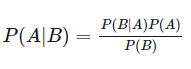

- 在 B 出现的前提下 A 出现的概率，等于 A 和 B 都出现的概率除以 B 出现的概率。
- 也就是先验概率和后验概率之间的关系。


## 朴素贝叶斯

- 朴素贝叶斯既可以是一种算法 - 朴素贝叶斯算法，也可以是一种模型 - 朴素贝叶斯分类模型（分类器）。
- 朴素贝叶斯算法可以直接使用贝叶斯定理来实现。
- 朴素贝叶斯分类器是一个分类模型，它的模型函数是朴素贝叶斯公式 - 贝叶斯定理在所有特征全部独立情况下的特例。


## 朴素贝叶斯模型
- 特点：基于贝叶斯定理和特征条件（属性）独立假设的分类器
- 优点：模型所需估计的参数很少，对缺失数据不太敏感，算法简单，具有很好的可解释性，与其他分类模型相比具有最小的理论误差率
- 缺点：特征之间相互独立，这个假设在实际应用中往往是不成立的，在属性个数比较多或者属性之间相关性较大时，分类效果不好
- 应用：一般应用在文本分类、垃圾邮件过滤、信用评估、钓鱼网站检测等
- 改进：属性直接完全独立的条件太强，可用半朴素贝叶斯之类的算法通过考虑部分关联性适度改进，或者使用数据降维（PCA）去除特征相关性


## 极大似然估计（MLE: Maximum Likelihood Estimation）

- 最常用的参数估计方法，就是去寻找让似然函数的取值达到最大的参数值的估计方法
- 参数估计的常用策略：
    1. 先假定样本特征具备某种特定的概率分布形式
    2. 再基于训练样本对特征的概率分布参数进行估计
- 似然是指某种事件发生的可能，和概率相似，两者的区别在于：
    1. 概率是在已知参数的情况下，预测后续观测所得到的结果
    2. 似然则相反，用于参数未知，但某些观测所得结果已知的情况，用来对参数进行估计
- 最大化一个似然函数同最大化它的自然对数是等价的

# 用代码实现朴素贝叶斯分类

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import time

## 数据勘查及预处理

In [3]:
# 读取数据 - 员工雇佣信息
data = pd.read_csv(r'../Datasets/career.csv')

# 数据基本信息
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   no         10 non-null     int64 
 1   985        10 non-null     object
 2   education  10 non-null     object
 3   skill      10 non-null     object
 4   enrolled   10 non-null     object
dtypes: int64(1), object(4)
memory usage: 528.0+ bytes


In [4]:
# 查看全部数据
data

,no,985,education,skill,enrolled
0,1,Yes,bachlor,C++,No
1,2,Yes,bachlor,Java,Yes
2,3,No,master,Java,Yes
3,4,No,master,C++,No
4,5,Yes,bachlor,Java,Yes
5,6,No,master,C++,No
6,7,Yes,master,Java,Yes
7,8,Yes,phd,C++,Yes
8,9,No,phd,Java,Yes
9,10,No,bachlor,Java,No


In [6]:
# Convert categorical variable to numeric
data['985_cleaned'] = np.where(data['985']=='Yes', 1, 0)
data['education_cleaned'] = np.where(data['education']=='bachlor', 1, np.where(data['education']=='master', 2, np.where(data['education']=='phd', 3, 4)))
data['skill_cleaned'] = np.where(data['skill']=='C++', 1, np.where(data['skill']=='Java', 2, 3))
data['enrolled_cleaned'] = np.where(data['enrolled']=='Yes', 1, 0)

data

,no,985,education,skill,enrolled,985_cleaned,education_cleaned,skill_cleaned,enrolled_cleaned
0,1,Yes,bachlor,C++,No,1,1,1,0
1,2,Yes,bachlor,Java,Yes,1,1,2,1
2,3,No,master,Java,Yes,0,2,2,1
3,4,No,master,C++,No,0,2,1,0
4,5,Yes,bachlor,Java,Yes,1,1,2,1
5,6,No,master,C++,No,0,2,1,0
6,7,Yes,master,Java,Yes,1,2,2,1
7,8,Yes,phd,C++,Yes,1,3,1,1
8,9,No,phd,Java,Yes,0,3,2,1
9,10,No,bachlor,Java,No,0,1,2,0


## 模型训练

In [11]:
# Split dataset in training and test datasets
X_train, X_test = train_test_split(data, test_size=0.2, random_state=int(time.time()))

X_test

,no,985,education,skill,enrolled,985_cleaned,education_cleaned,skill_cleaned,enrolled_cleaned
5,6,No,master,C++,No,0,2,1,0
8,9,No,phd,Java,Yes,0,3,2,1


In [12]:
# Instantiate the classifier
gnb = GaussianNB()
used_features = ['985_cleaned', 'education_cleaned', 'skill_cleaned']

In [14]:
# Train classifier
gnb.fit(X_train[used_features].values, X_train['enrolled_cleaned'])

GaussianNB()

In [15]:
# Predict
y_pred = gnb.predict(X_test[used_features])

y_pred

array([0, 1])

In [24]:
# Print results
print('Number of mislabeled points out of a total {} points: {}, performance {:05.2f}%'
      .format(
          X_test.shape[0],
          (X_test['enrolled_cleaned'] != y_pred).sum(),
          100 * (1 - (X_test['enrolled_cleaned'] != y_pred).sum() / X_test.shape[0])
      ))

Number of mislabeled points out of a total 2 points: 0, performance 100.00%
